In [26]:
# Mount Google Colab drive for convenience

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Using Kaggle API Key

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [28]:
# Download our CSV Dataset

!kaggle datasets download -d aravindpcoder/diabetes-dataset

  0% 0.00/15.6k [00:00<?, ?B/s]
100% 15.6k/15.6k [00:00<00:00, 26.9MB/s]


In [29]:
# Unzip and remove the dataset zip

!unzip \*.zip  && rm *.zip

Archive:  diabetes-dataset.zip
replace Dataset of Diabetes .csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [42]:
# Let's prepare our training and test variables with dataframes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


csv_path = '/content/Dataset of Diabetes .csv'

df = pd.read_csv(csv_path)

df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


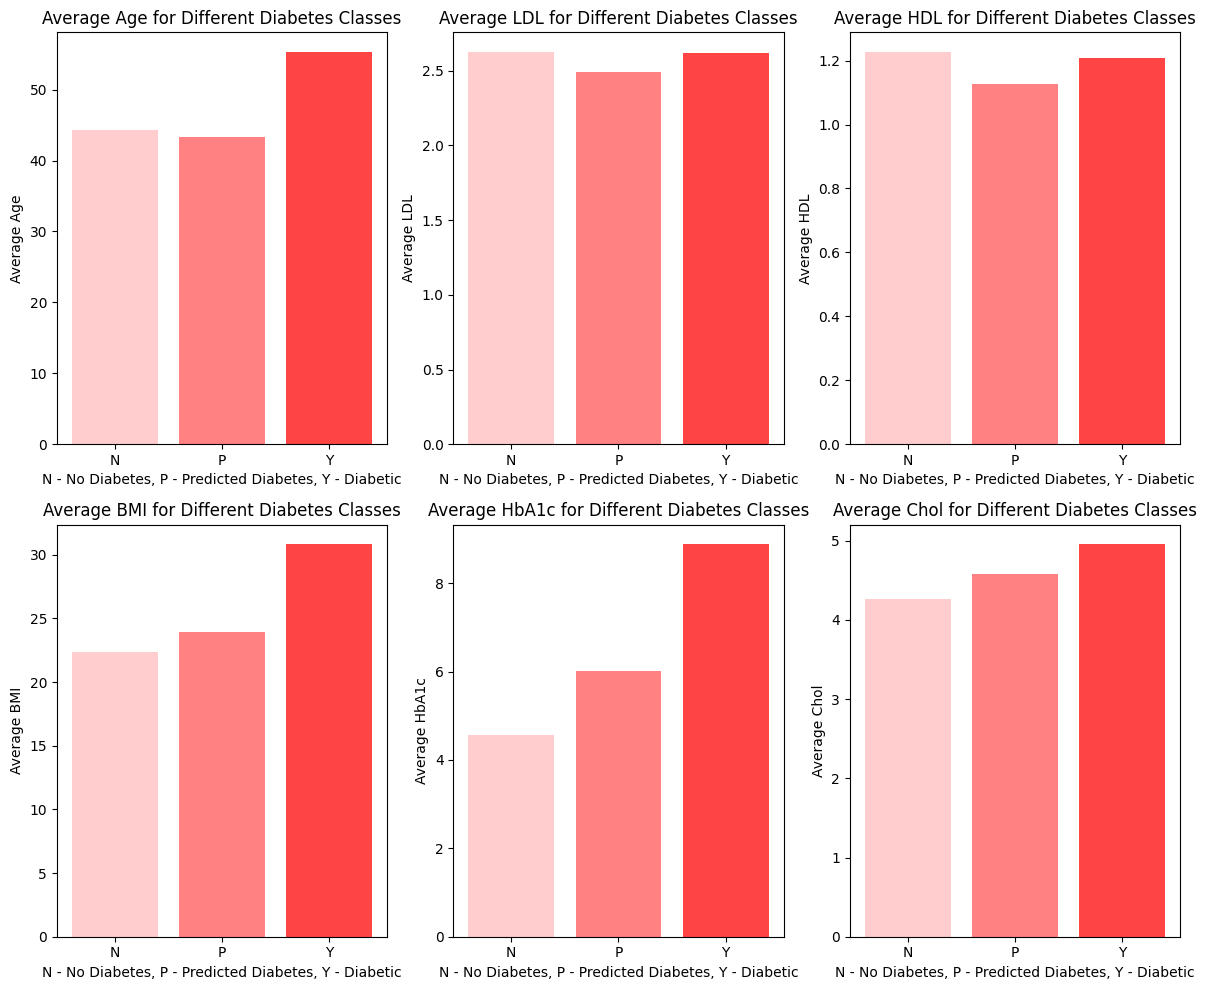

In [43]:
# Let's visualize the data a bit

import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

df['CLASS'] = df['CLASS'].str.strip()

# Calculate average values for each class
average_age = df.groupby('CLASS')['AGE'].mean()
average_ldl = df.groupby('CLASS')['LDL'].mean()
average_hdl = df.groupby('CLASS')['HDL'].mean()
average_BMI	= df.groupby('CLASS')['BMI'].mean()
average_HbA1c = df.groupby('CLASS')['HbA1c'].mean()
average_Chol = df.groupby('CLASS')['Chol'].mean()

# Create subplots
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 10))

ax1.bar(average_age.index, average_age.values, color=['#ffcdcd', '#ff8181', '#ff4444'])
ax1.set_ylabel('Average Age')
ax1.set_title('Average Age for Different Diabetes Classes')
ax1.set_xlabel('N - No Diabetes, P - Predicted Diabetes, Y - Diabetic')

ax2.bar(average_ldl.index, average_ldl.values, color=['#ffcdcd', '#ff8181', '#ff4444'])
ax2.set_ylabel('Average LDL')
ax2.set_title('Average LDL for Different Diabetes Classes')
ax2.set_xlabel('N - No Diabetes, P - Predicted Diabetes, Y - Diabetic')

ax3.bar(average_hdl.index, average_hdl.values, color=['#ffcdcd', '#ff8181', '#ff4444'])
ax3.set_xlabel('N - No Diabetes, P - Predicted Diabetes, Y - Diabetic')
ax3.set_ylabel('Average HDL')
ax3.set_title('Average HDL for Different Diabetes Classes')

ax4.bar(average_BMI.index, average_BMI.values, color = ['#ffcdcd', '#ff8181', '#ff4444'])
ax4.set_xlabel('N - No Diabetes, P - Predicted Diabetes, Y - Diabetic')
ax4.set_ylabel('Average BMI')
ax4.set_title('Average BMI for Different Diabetes Classes')

ax5.bar(average_HbA1c.index, average_HbA1c.values, color = ['#ffcdcd', '#ff8181', '#ff4444'])
ax5.set_xlabel('N - No Diabetes, P - Predicted Diabetes, Y - Diabetic')
ax5.set_ylabel('Average HbA1c')
ax5.set_title('Average HbA1c for Different Diabetes Classes')

ax6.bar(average_Chol.index, average_Chol.values, color = ['#ffcdcd', '#ff8181', '#ff4444'])
ax6.set_xlabel('N - No Diabetes, P - Predicted Diabetes, Y - Diabetic')
ax6.set_ylabel('Average Chol')
ax6.set_title('Average Chol for Different Diabetes Classes')

plt.tight_layout()
plt.show()


In [48]:
#Preparing the DataFrame
cropped_df = pd.read_csv(csv_path, header = None)

cropped_df = cropped_df.drop(cropped_df.index[0]).reset_index(drop=True)
# We can safely drop column 1 since it's only patient number, won't be of any use and might create errors in training
cropped_df = cropped_df.drop(1, axis=1)

le = LabelEncoder()
cropped_df[2] = le.fit_transform(cropped_df[2])

# There is a slight error in the column 13 where the classes are, some have an extra blank space so we remove it
cropped_df[13] = cropped_df[13].str.strip()
cropped_df[13] = le.fit_transform(cropped_df[13])

X = cropped_df.iloc[:, :-1]

y = cropped_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Can be a mess in the visualization, but it's just for assurance

print(X)

print(y)

print(X_train)

print(y_train)

      0   2   3    4   5     6    7    8    9    10    11    12
0    502   0  50  4.7  46   4.9  4.2  0.9  2.4  1.4   0.5    24
1    735   1  26  4.5  62   4.9  3.7  1.4  1.1  2.1   0.6    23
2    420   0  50  4.7  46   4.9  4.2  0.9  2.4  1.4   0.5    24
3    680   0  50  4.7  46   4.9  4.2  0.9  2.4  1.4   0.5    24
4    504   1  33  7.1  46   4.9  4.9    1  0.8    2   0.4    21
..   ...  ..  ..  ...  ..   ...  ...  ...  ...  ...   ...   ...
995  200   1  71   11  97     7  7.5  1.7  1.2  1.8   0.6    30
996  671   1  31    3  60  12.3  4.1  2.2  0.7  2.4  15.4  37.2
997  669   1  30  7.1  81   6.7  4.1  1.1  1.2  2.4   8.1  27.4
998   99   1  38  5.8  59   6.7  5.3    2  1.6  2.9    14  40.5
999  248   1  54    5  67   6.9  3.8  1.7  1.1    3   0.7    33

[1000 rows x 12 columns]
0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: 13, Length: 1000, dtype: int64
      0   2   3     4    5     6    7    8    9    10   11    12
29   

In [49]:
# Decision Tree is a good option for categorical classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# We can easily train it with a 1000x12 X_train and get the results quite fast
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.98


In [50]:
#Let's see what we get in metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))



[[ 19   0   2]
 [  0   6   0]
 [  1   1 171]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.98      0.98      0.98       200



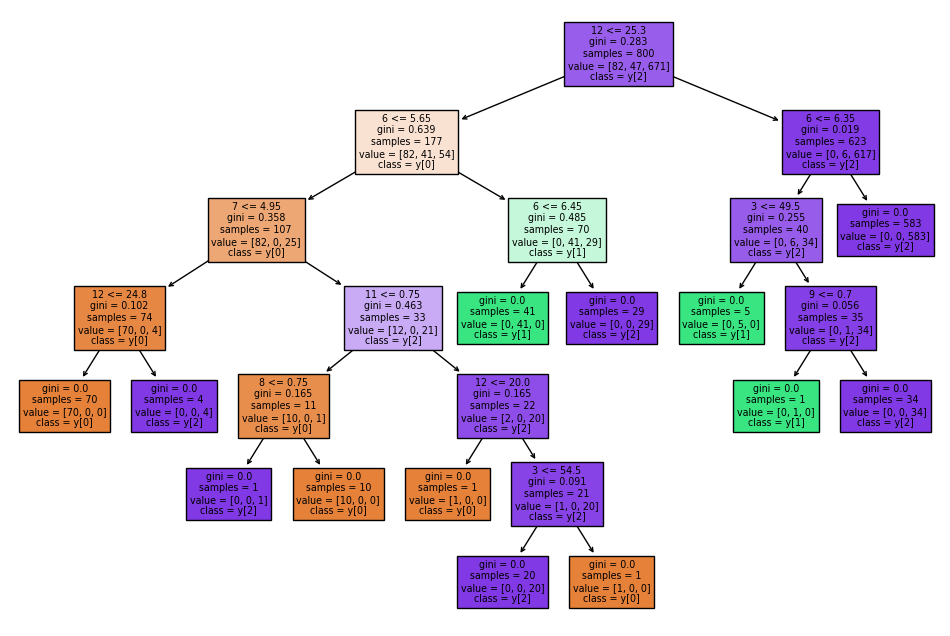

In [51]:
# Let's take a look at how our tree got built

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [36]:
# Now, for a simple prediction test

prediction_test = pd.DataFrame({
    0: [106],
    2: [0],
    3: [44],
    4: [4.3],
    5: [49],
    6: [4],
    7: [5.6],
    8: [1.4],
    9: [1.4],
    10: [3.6],
    11: [0.6],
    12: [22]
})

prediction = dt_classifier.predict(prediction_test)

if prediction == 0:
  print("Prediction was: N, no conclusion of diabetes")
elif prediction == 1:
  print("Prediction was: P, prediction of future diabetes")
else:
  print("Prediction was: Y, highest probability of diabetes")


Prediction was: N, no conclusion of diabetes


In [37]:
# For curiosity, we can take a look at how our decision tree was activated during this test

import numpy as np

decision_path = dt_classifier.decision_path(prediction_test)
dense_decision_path = decision_path.toarray()

print("Dense Decision Path:")
print(dense_decision_path)

activated_nodes = np.where(dense_decision_path)[1]
print("\nActivated Nodes:")
print(activated_nodes)

Dense Decision Path:
[[1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Activated Nodes:
[0 1 2 6 7 9]
